In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [2]:
# Загрузка данных (почти copy-paste из книги "Python и анализ данных")
users_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None,
                     names=users_names, engine='python')

ratings_names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None,
                       names=ratings_names, engine='python')

movies_names = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None,
                      names=movies_names, engine='python')

In [3]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Объединяем 3 таблицы в одну (для удобства)
df = pd.merge(pd.merge(ratings, users), movies)
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


## EDA

#### 1. Количество фильмов, пользователей и оценок

In [7]:
print('Кол-во фильмов: ' + str(len(movies)))
print('Кол-во пользователей: ' + str(len(users)))
print('Кол-во оценок: ' + str(len(ratings)))

Кол-во фильмов: 3883
Кол-во пользователей: 6040
Кол-во оценок: 1000209


#### 2. Распределения количества оценок по фильмам и пользователям

In [8]:
# 1. Наиболее оцениваемые фильмы
most_count_rating_movies = df.groupby(['movie_id', 'title'])['rating'].agg({'rating_count': len}) \
                        .sort_values("rating_count", ascending=False).reset_index()
most_count_rating_movies.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,movie_id,title,rating_count
0,2858,American Beauty (1999),3428
1,260,Star Wars: Episode IV - A New Hope (1977),2991
2,1196,Star Wars: Episode V - The Empire Strikes Back...,2990
3,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,480,Jurassic Park (1993),2672
5,2028,Saving Private Ryan (1998),2653
6,589,Terminator 2: Judgment Day (1991),2649
7,2571,"Matrix, The (1999)",2590
8,1270,Back to the Future (1985),2583
9,593,"Silence of the Lambs, The (1991)",2578


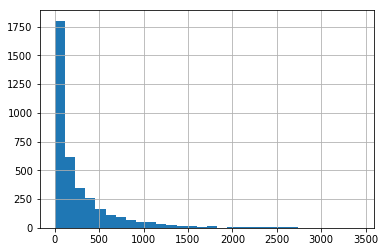

In [9]:
most_count_rating_movies['rating_count'].hist(bins=30)

Видим, что довольно мало фильмов имеют много оценок

In [10]:
# 2. Топ-10 пользователей, поставивших наибольшее количество оценок
most_count_rating_users = df.groupby(['user_id'])['rating'].agg({'rating_count': len}) \
                        .sort_values('rating_count', ascending=False).reset_index()
most_count_rating_users.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,user_id,rating_count
0,4169,2314
1,1680,1850
2,4277,1743
3,1941,1595
4,1181,1521
5,889,1518
6,3618,1344
7,2063,1323
8,1150,1302
9,1015,1286


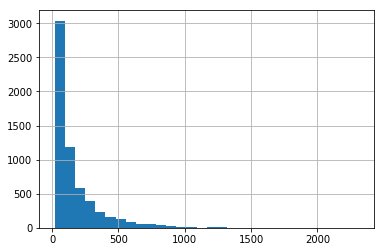

In [11]:
most_count_rating_users['rating_count'].hist(bins=30)

Видим, что достаточно мало пользователей дают много оценок фильмам

#### 3. Посмотреть на смещение оценок, увидеть, сколько пользователей занижают оценки и завышают оценки

In [12]:
# Сравним оценки пользователей со средним значением
mean_rating_all_films = df['rating'].mean()
mean_rating_all_films

3.581564453029317

In [13]:
# Средние оценки по пользователям
users_mean_rating = df.groupby(['user_id'])['rating'].mean().sort_values(ascending=False).reset_index()
users_mean_rating = users_mean_rating.rename(index=str, columns={'rating':'mean_rating'})
users_mean_rating.head(10)

,user_id,mean_rating
0,283,4.962963
1,2339,4.956522
2,3324,4.904762
3,3902,4.890909
4,446,4.843137
5,447,4.837838
6,4649,4.818182
7,4634,4.813725
8,1131,4.796117
9,4925,4.761905


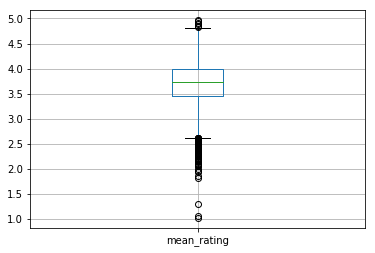

In [14]:
users_mean_rating.boxplot(column=['mean_rating'])

In [15]:
# Количество пользователей, у которых средяя оценка выше общей средней, и у которых ниже
user_count_high_mean_rating = len(users_mean_rating[users_mean_rating['mean_rating'] >= mean_rating_all_films])
user_count_low_mean_rating = len(users_mean_rating[users_mean_rating['mean_rating'] < mean_rating_all_films])
print("user_count_high_mean_rating = " + str(user_count_high_mean_rating))
print("user_count_low_mean_rating = " + str(user_count_low_mean_rating))
# похоже, что большая часть пользователей - оптимисты

user_count_high_mean_rating = 3896
user_count_low_mean_rating = 2144


#### 4. Оценить средние оценки по фильмам и по пользователям

In [16]:
# Средние оценки по фильмам
movies_mean_rating = df.groupby(['movie_id', 'title'])['rating'].mean().sort_values(ascending=False).reset_index()
movies_mean_rating = movies_mean_rating.rename(index=str, columns={"rating": "mean_rating"})
movies_mean_rating.head(10)

,movie_id,title,mean_rating
0,3382,Song of Freedom (1936),5.0
1,3172,Ulysses (Ulisse) (1954),5.0
2,3607,One Little Indian (1973),5.0
3,3656,Lured (1947),5.0
4,3280,"Baby, The (1973)",5.0
5,787,"Gate of Heavenly Peace, The (1995)",5.0
6,1830,Follow the Bitch (1998),5.0
7,989,Schlafes Bruder (Brother of Sleep) (1995),5.0
8,3881,Bittersweet Motel (2000),5.0
9,3233,Smashing Time (1967),5.0


In [17]:
# Объединим в одну таблицу средний рейтинг и количество оценок для фильма. Оставим фильмы, у которых
# количество оценок больше заданного порога
min_rating_count = 10

movie_rating = pd.merge(most_count_rating_movies[most_count_rating_movies['rating_count'] > min_rating_count],
                        movies_mean_rating).sort_values(by=['mean_rating'], ascending=False)
movie_rating.head()

,movie_id,title,rating_count,mean_rating
2276,2905,Sanjuro (1962),69,4.608696
470,2019,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510
23,318,"Shawshank Redemption, The (1994)",2227,4.554558
24,858,"Godfather, The (1972)",2223,4.524966
443,745,"Close Shave, A (1995)",657,4.520548


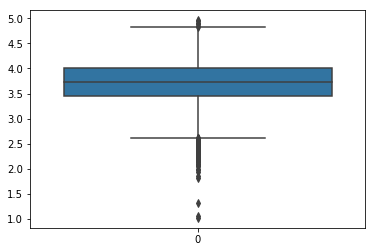

In [19]:
sns.boxplot(data=users_mean_rating['mean_rating'])

In [21]:
users_mean_rating.mean_rating.describe()

count    6040.000000
mean        3.702705
std         0.429622
min         1.015385
25%         3.444444
50%         3.735294
75%         4.000000
max         4.962963
Name: mean_rating, dtype: float64

Видим, что есть пользователи, у которых средние оценки сильно отличаются от среднего значения. Оценим их количество

In [22]:
user_count_only_high_rating = len(users_mean_rating[users_mean_rating['mean_rating'] >= 4.9])
user_count_only_low_rating = len(users_mean_rating[users_mean_rating['mean_rating'] < 1.5])
print("user_count_only_high_rating = " + str(user_count_only_high_rating))
print("user_count_only_low_rating = " + str(user_count_only_low_rating))
# Видим, что таких пользователей мало

user_count_only_high_rating = 3
user_count_only_low_rating = 3


#### 5. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому. Вывести топ фильмов из этих списков

В качестве такого критерия рассмотрим средний рейтинг фильма при условии, что его оценило достаточно много пользователей (т.е. не будем рассматривать фильмы, у которых очень мало оценок). Воспользуемся построенной выше таблицей movie_rating, в которой приведён средний рейтинг для фильмов, у которых больше 10 оценок. Будем считать, что если средний рейтинг фильма в этой таблице > 4.3, то он нравится всем, а если < 2.0, то он не нравится никому. 

In [23]:
movies_like_everyone = movie_rating[movie_rating['mean_rating'] > 4.3]
movies_like_noone = movie_rating[movie_rating['mean_rating'] < 2.0]
print("movies_like_everyone count = " + str(len(movies_like_everyone)))
print("movies_like_noone count = " + str(len(movies_like_noone)))

movies_like_everyone count = 62
movies_like_noone count = 97


In [24]:
movies_like_everyone.head(10)

,movie_id,title,rating_count,mean_rating
2276,2905,Sanjuro (1962),69,4.608696
470,2019,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510
23,318,"Shawshank Redemption, The (1994)",2227,4.554558
24,858,"Godfather, The (1972)",2223,4.524966
443,745,"Close Shave, A (1995)",657,4.520548
38,50,"Usual Suspects, The (1995)",1783,4.517106
17,527,Schindler's List (1993),2304,4.510417
269,1148,"Wrong Trousers, The (1993)",882,4.507937
672,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),470,4.491489
11,1198,Raiders of the Lost Ark (1981),2514,4.477725


In [25]:
movies_like_noone.tail(10)

,movie_id,title,rating_count,mean_rating
3224,1383,Adrenalin: Fear the Rush (1996),11,1.545455
2803,2449,"Garbage Pail Kids Movie, The (1987)",32,1.531250
2607,3945,Digimon: The Movie (2000),43,1.488372
3120,1989,Prom Night III: The Last Kiss (1989),15,1.466667
1876,810,Kazaam (1996),120,1.466667
2914,3573,Carnosaur 2 (1995),26,1.461538
2610,1323,Amityville 3-D (1983),43,1.372093
2552,1739,3 Ninjas: High Noon On Mega Mountain (1998),47,1.361702
2595,1495,Turbo: A Power Rangers Movie (1997),44,1.318182
3088,3574,Carnosaur 3: Primal Species (1996),17,1.058824


Часть из этих фильмов мне известна. С оценками можно согласиться. В верхней части фильмы, ставшие классикой, с высоким рейтингом на IMDB. В нижней части - треш вроде "Карнозавра 3" с рейтингом IMDB 2.9

#### 6. Выбрать лучшие фильмы

В качестве "лучших фильмов" возьмём фильмы, определённые выше в таблице movies_like_everyone

## Создание рекомендательной системы